In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from analysis_utils.plotting import *
from analysis_utils.describe_target import *

In [17]:
# set the root data directory
root_data_dir = "../../Data"
sat_img_dir = f"{root_data_dir}/satellite_imgs"

# Load the LSMS data
lsms_path = f"{root_data_dir}/lsms/processed/labels_cluster_v1.csv"
lsms_df = pd.read_csv(lsms_path)
lsms_df['log_mean_pc_cons_usd_2017'] = np.log(lsms_df['mean_pc_cons_usd_2017'])

## Describe the target variables

In [3]:
#### Table 1: Describe the target variables
print('Mean PC consumption')
print('mean & median & min & max & sd & n')
describe_target(lsms_df, 'mean_pc_cons_usd_2017')
print("Mean Asset index")
describe_target(lsms_df, 'mean_asset_index_yeh')

Mean PC consumption
mean & median & min & max & sd & n
    4.09 &    3.19 &    0.33 &    65.66 &    3.34 &    7141 \\
Mean Asset index
    0.13 &    -0.21 &    -2.67 &    4.66 &    1.55 &    7141 \\


In [5]:
#### Table 2: Describe the target variables by country
print("Consumption expenditure")
describe_target_cntry(lsms_df, 'mean_pc_cons_usd_2017')
print("\nLog Consumption expenditure")
describe_target_cntry(lsms_df, 'log_mean_pc_cons_usd_2017')
print("\nAsset Index")
describe_target_cntry(lsms_df, 'mean_asset_index_yeh')

Consumption expenditure
Ethiopia & 2.47 & 2.14 & 0.33 & 12.27 & 1.48 & 1193 \\
Malawi & 4.10 & 3.21 & 1.15 & 46.51 & 3.72 & 408 \\
Nigeria & 4.92 & 4.26 & 1.16 & 42.69 & 3.27 & 1595 \\
Tanzania & 4.33 & 3.38 & 0.79 & 65.66 & 3.53 & 2195 \\
Uganda & 4.12 & 2.94 & 0.52 & 45.64 & 3.60 & 1750 \\

Log Consumption expenditure
Ethiopia & 0.75 & 0.76 & -1.10 & 2.51 & 0.56 & 1193 \\
Malawi & 1.25 & 1.17 & 0.14 & 3.84 & 0.50 & 408 \\
Nigeria & 1.45 & 1.45 & 0.15 & 3.75 & 0.52 & 1595 \\
Tanzania & 1.29 & 1.22 & -0.24 & 4.18 & 0.56 & 2195 \\
Uganda & 1.17 & 1.08 & -0.65 & 3.82 & 0.67 & 1750 \\

Asset Index
Ethiopia & -1.09 & -1.56 & -2.67 & 2.86 & 1.28 & 1193 \\
Malawi & -0.37 & -0.72 & -1.87 & 3.34 & 0.98 & 408 \\
Nigeria & 0.74 & 0.81 & -2.25 & 4.66 & 1.26 & 1595 \\
Tanzania & 0.86 & 1.20 & -2.36 & 3.96 & 1.65 & 2195 \\
Uganda & -0.39 & -0.65 & -2.63 & 4.07 & 1.10 & 1750 \\


In [6]:
# Table 3: Decompose the variance into SSW and SSB
print("Consumption expenditure")
_ = decomp_SST(lsms_df, 'cluster_id', 'mean_pc_cons_usd_2017')

print("\n\nLog Consumption Expenditure")
_ = decomp_SST(lsms_df, 'cluster_id', 'log_mean_pc_cons_usd_2017')

print("\n\nAsset Index")
_ = decomp_SST(lsms_df, 'cluster_id', 'mean_asset_index_yeh')

Consumption expenditure
SSW = 15488.5623 - SSB = 64124.9129 - SST = 79613.4751 - SST directly calc = 79613.4751
Share of SSW = 0.1945 - Share of SSB = 0.8055

 Latex ouput
mean_pc_cons_usd_2017 & 15488.56 & 64124.91 & 79613.48 & 0.19 & 0.81 & 7141


Log Consumption Expenditure
SSW = 393.5443 - SSB = 2345.2700 - SST = 2738.8143 - SST directly calc = 2738.8143
Share of SSW = 0.1437 - Share of SSB = 0.8563

 Latex ouput
log_mean_pc_cons_usd_2017 & 393.54 & 2345.27 & 2738.81 & 0.14 & 0.86 & 7141


Asset Index
SSW = 563.2399 - SSB = 16543.7401 - SST = 17106.9800 - SST directly calc = 17106.9800
Share of SSW = 0.0329 - Share of SSB = 0.9671

 Latex ouput
mean_asset_index_yeh & 563.24 & 16543.74 & 17106.98 & 0.03 & 0.97 & 7141


In [6]:
lsms_df['n_households'].describe()

count    7141.000000
mean        7.716846
std         2.913445
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        16.000000
Name: n_households, dtype: float64

In [7]:
# Within variance in relation to the number of households per cluster
thresholds = [1,2,3,4,5,6,7,8,9,10]
n = []
n_clusters = []
variance_share = []
for i in thresholds:
    sub_df = lsms_df[lsms_df.n_households >= i].reset_index(drop = True)
    SSW, SSB, SST = decomp_SST(sub_df, 'cluster_id', 'log_mean_pc_cons_usd_2017', verbose = False)
    variance_share.append(SSW/SST)
    n.append(len(sub_df))
    n_clusters.append(len(np.unique(sub_df.cluster_id)))
    

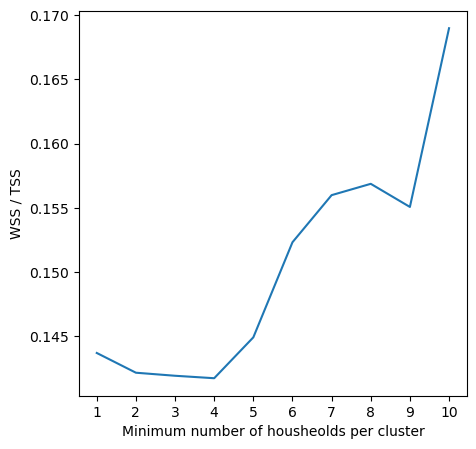

In [11]:
plt.figure(figsize = (5,5))
plt.plot(thresholds, variance_share)
plt.xticks(ticks = thresholds)
plt.xlabel("Minimum number of housheolds per cluster")
plt.ylabel('WSS / TSS')
plt.savefig("../figures/target_vars/share_WSS.png", dpi = 300, bbox_inches = 'tight')
plt.show()

In [21]:
print('Number of observations')
print(n)
print('\nNumber of clusters')
print(n_clusters)

Number of observations
[7141, 7025, 6879, 6593, 6228, 5652, 4911, 3699, 2539, 1888]

 Number of clusters
[2255, 2231, 2203, 2145, 2052, 1904, 1686, 1296, 895, 702]


# Plot static satellite images

In [18]:
cluster_id = 'uga_3040004'

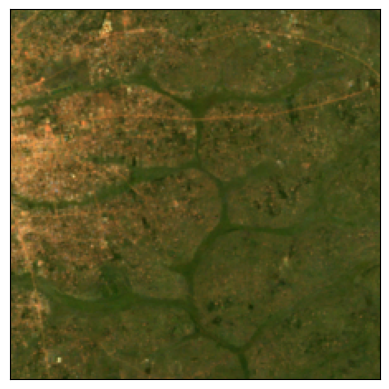

In [6]:
plot_ls(cluster_id)

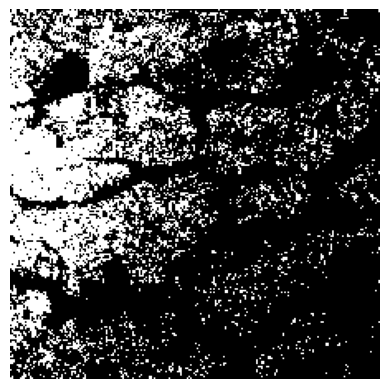

In [5]:
plot_wsf(cluster_id)

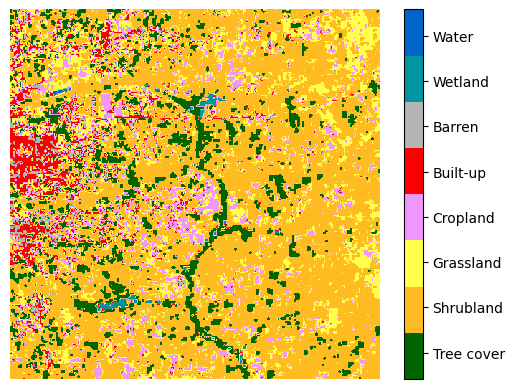

In [15]:
plot_lc_esa(cluster_id)

# Plot dynamic images

In [17]:
#unique_id = 'uga_3040004_2018'
cluster_id = 'uga_3040004'

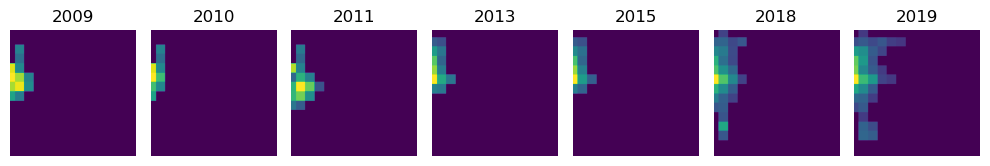

In [38]:
plot_nl_cluster(cluster_id)

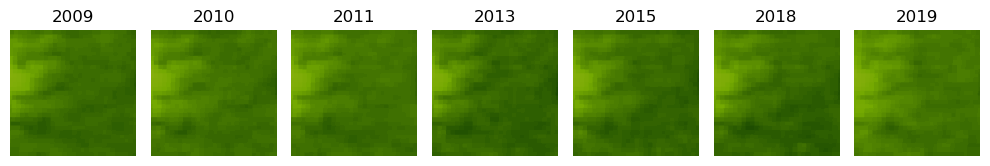

In [41]:
plot_ndvi_cluster(cluster_id)

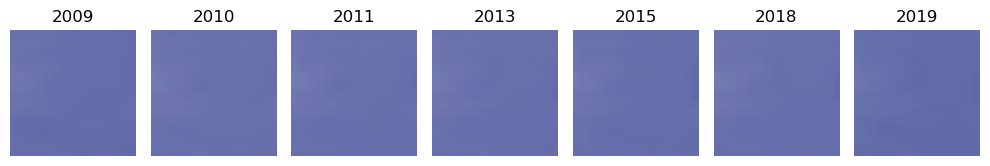

In [55]:
plot_ndwi_gao_cluster(cluster_id)

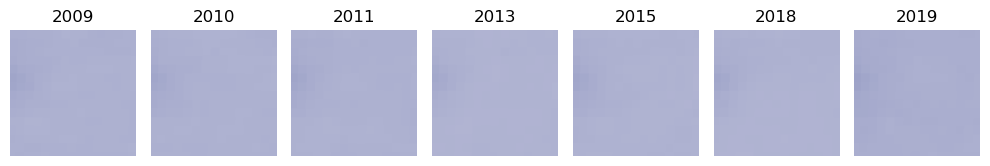

In [56]:
plot_ndwi_mcf_cluster(cluster_id)

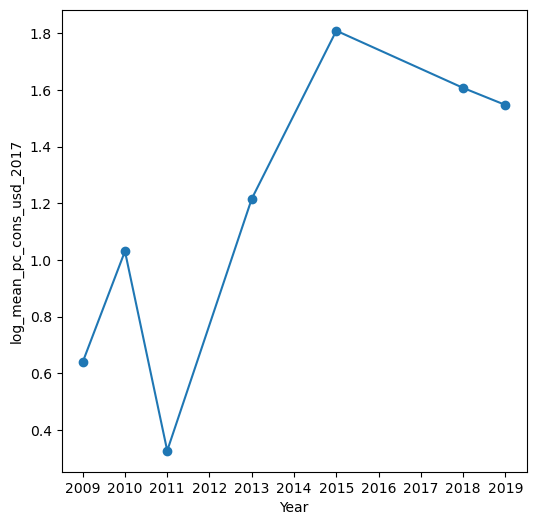

In [46]:
plot_target_cluster(cluster_id, lsms_df, 'log_mean_pc_cons_usd_2017')

# Plot demeaned images

In [40]:
def plot_delta_imgs(cluster_id, fname=None, title=None, channel = 0):
    data_type = 'RS_v2'
    sat_img_dir = "../../Data/satellite_imgs"
    img_dir = f"{sat_img_dir}/RS_v2/{data_type}_deltas"

    # list all files in image directory
    files = np.array(os.listdir(img_dir))
    mask = [cluster_id in i for i in files]
    files = np.sort(files[mask])

    # plot all images in one plot
    num_images = len(files)
    print(num_images)
    if num_images > 7:
        rows = 2
        cols = int(np.ceil(num_images/2))
    else:
        rows = 1
        cols = num_images

    fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
    
    for i, file in enumerate(files):
        year_1 = file[-14:-10]
        year_2 = file[-8:-4]
        img_pth = os.path.join(img_dir, file)
        img = np.load(img_pth)[:, :, channel]
        ax = axes[i]
        ax.imshow(img)
        ax.axis('off')

        ax.set_title(f"{year_1} - {year_2}")
    plt.tight_layout()
    #plt.legend()

    if fname is not None:
        pth = f"../figures/sat_imgs/{fname}"
        plt.savefig(pth, dpi=300, bbox_inches='tight')

    plt.show()

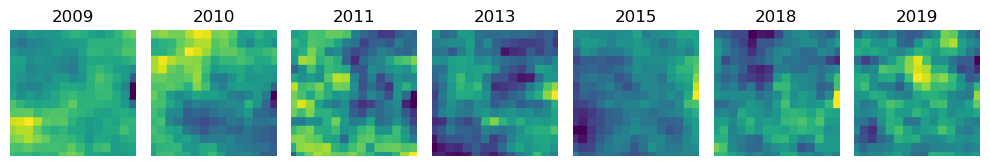

In [29]:
plot_demeaned_imgs(cluster_id, channel = 2)

In [42]:
    data_type = 'RS_v2'
    sat_img_dir = "../../Data/satellite_imgs"
    img_dir = f"{sat_img_dir}/RS_v2/{data_type}_deltas"

    # list all files in image directory
    files = np.array(os.listdir(img_dir))
    mask = [cluster_id in i for i in files]
    files = np.sort(files[mask])

In [43]:
files

array(['RS_v2_uga_3040004_2009_2010.npy',
       'RS_v2_uga_3040004_2009_2011.npy',
       'RS_v2_uga_3040004_2009_2013.npy',
       'RS_v2_uga_3040004_2009_2015.npy',
       'RS_v2_uga_3040004_2009_2018.npy',
       'RS_v2_uga_3040004_2009_2019.npy',
       'RS_v2_uga_3040004_2010_2011.npy',
       'RS_v2_uga_3040004_2010_2013.npy',
       'RS_v2_uga_3040004_2010_2015.npy',
       'RS_v2_uga_3040004_2010_2018.npy',
       'RS_v2_uga_3040004_2010_2019.npy',
       'RS_v2_uga_3040004_2011_2010.npy',
       'RS_v2_uga_3040004_2011_2013.npy',
       'RS_v2_uga_3040004_2011_2015.npy',
       'RS_v2_uga_3040004_2011_2018.npy',
       'RS_v2_uga_3040004_2011_2019.npy',
       'RS_v2_uga_3040004_2013_2009.npy',
       'RS_v2_uga_3040004_2013_2010.npy',
       'RS_v2_uga_3040004_2013_2015.npy',
       'RS_v2_uga_3040004_2013_2018.npy',
       'RS_v2_uga_3040004_2013_2019.npy',
       'RS_v2_uga_3040004_2015_2018.npy',
       'RS_v2_uga_3040004_2015_2019.npy',
       'RS_v2_uga_3040004_2018_201

In [44]:
len(files)

27